In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

import pickle

In [ ]:
# load the oringial data matrix
orig = pickle.load(open(PATHTOFILE,'rb'))
orig = orig.drop('date',axis=1)

In [ ]:
# parameters for clustering
range_n_clusters = range(2,15,1)
method = 'kmeans'

# preprocessing
scaler = StandardScaler()
X = orig.copy()
dc = FactorAnalysis(random_state=0,n_components=3)
X = scaler.fit_transform(X)
X = dc.fit_transform(X)
print(X.shape)

(1446, 3)


2     0.412582
3     0.398368
4     0.428974
5     0.431107
6     0.363972
7     0.381656
8     0.391349
9     0.395093
10    0.390502
11    0.387866
12    0.352000
13    0.353856
14    0.345793
dtype: float64


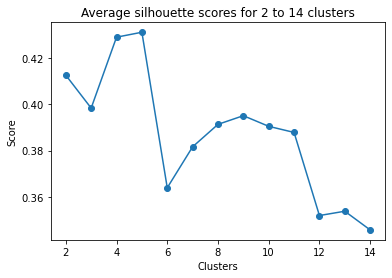

In [ ]:
#silhouette plot
score_dict = {}
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=0)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    score_dict[n_clusters] = silhouette_avg

plt.plot(list(score_dict.keys()),list(score_dict.values()),marker='o')
plt.title(
    'Average silhouette scores for {} to {} clusters'.format(
        min(range_n_clusters),max(range_n_clusters)))
plt.xlabel('Clusters')
plt.ylabel('Score')
print(pd.Series(score_dict))

In [ ]:
# clustering for selected hyperparameters:
# in this example, 3 factors and 5 clusters
clusterer = KMeans(n_clusters=5,random_state=0)
clusterer.fit(X)
# transform centroids back to original scale
cc_raw = scaler.inverse_transform(
    np.dot(clusterer.cluster_centers_,dc.components_))
cc_raw = pd.DataFrame(cc_raw,columns=orig.columns)
for comp in range(len(cc_raw)):
    display(cc_raw.T[comp].sort_values(ascending=False)[:9])

hamd_depression         0.774183
hamd_anxiety_somatic    0.758251
hamd_anxiety_psychic    0.590497
hamd_apathy             0.451863
hamd_somatic_general    0.382672
ymrs_irritability       0.372531
hamd_guilt              0.352404
hamd_insomnia_early     0.314805
hamd_agitation          0.284769
Name: 0, dtype: float64

hamd_depression         2.217758
hamd_apathy             1.945567
hamd_anxiety_somatic    1.373091
hamd_anxiety_psychic    1.345002
hamd_somatic_general    1.266879
hamd_guilt              1.133277
hamd_agitation          0.895326
hamd_insomnia_early     0.830094
hamd_insomnia_mid       0.703418
Name: 1, dtype: float64

ymrs_hyperverbal         2.518755
ymrs_increased_energy    1.901841
ymrs_elevated_mood       1.541277
ymrs_thought_disorder    1.038754
ymrs_decreased_sleep     0.938024
hamd_depression          0.768786
hamd_anxiety_somatic     0.753405
ymrs_grandiosity         0.709435
ymrs_irritability        0.652102
Name: 2, dtype: float64

ymrs_irritability       3.189466
hamd_depression         1.748982
hamd_anxiety_psychic    1.692763
ymrs_aggression         1.644627
hamd_anxiety_somatic    1.531492
hamd_apathy             1.497368
hamd_guilt              1.144982
hamd_agitation          1.077842
hamd_somatic_general    0.991547
Name: 3, dtype: float64

ymrs_hyperverbal         3.812884
ymrs_increased_energy    2.759282
ymrs_irritability        2.747331
ymrs_elevated_mood       2.088438
ymrs_thought_disorder    1.728547
ymrs_decreased_sleep     1.512226
ymrs_aggression          1.432379
hamd_anxiety_psychic     1.237090
hamd_anxiety_somatic     1.155428
Name: 4, dtype: float64

In [ ]:
# assign observations in original data matrix to clusters
clusterer.cluster_centers_ = cc_raw.values
pred = clusterer.fit_predict(X)
for i in range(len(cc_raw)):
    print(i,len([n for n in pred if n==i]))

0 716
1 316
2 209
3 114
4 91
